## Import libraries & data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from sklearn.preprocessing import Normalizer

In [2]:
data = pd.read_csv("hela.csv")

In [3]:
features = data.iloc[:,1:-1].apply(pd.to_numeric,errors='coerce')

In [4]:
features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,367.58,134.26,340.10,55.84,128.98,116.06,146.24,225.37,71.78,250.85,97.70,125.74
1,377.99,143.78,909.55,69.86,111.05,328.55,452.36,848.00,448.88,845.08,105.52,164.28
2,267.28,208.66,186.35,88.21,65.66,169.68,195.88,384.15,73.11,315.63,122.91,156.95
3,173.69,155.30,357.10,62.56,154.09,122.71,185.44,297.12,111.28,397.26,127.79,159.28
4,170.73,176.52,507.94,96.17,280.72,189.48,306.04,574.34,225.78,716.71,129.45,214.02
...,...,...,...,...,...,...,...,...,...,...,...,...
6957,201.98,117.21,170.08,65.21,241.28,225.36,104.44,116.36,92.24,134.75,118.60,144.20
6958,68.34,85.99,63.93,65.09,378.16,74.21,91.07,84.32,181.80,86.77,145.77,154.72
6959,157.66,104.52,71.13,159.14,101.55,62.88,76.72,88.64,90.18,93.01,126.55,177.13
6960,244.87,112.18,428.63,76.11,337.85,183.92,271.79,462.68,414.16,451.90,104.97,253.35


C:\Users\leyen\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


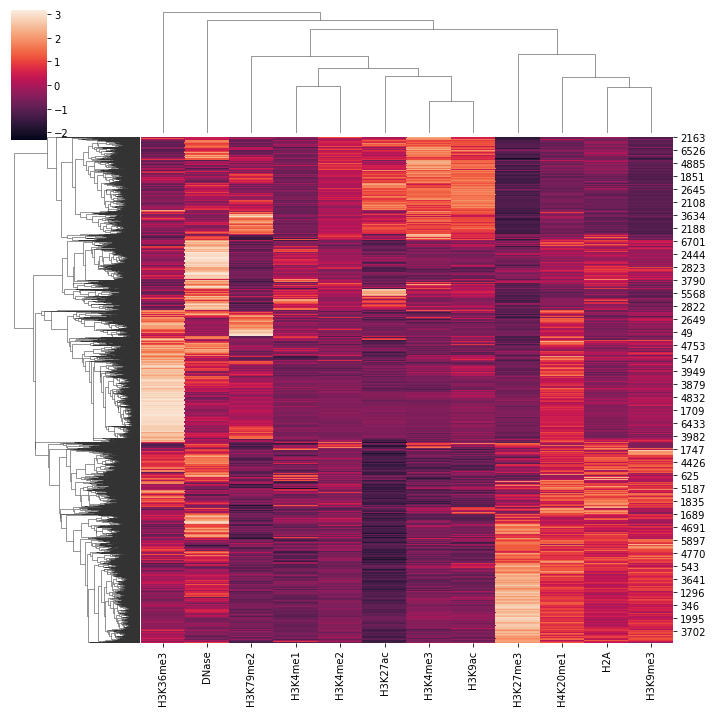

In [5]:
sns.clustermap(features, z_score=0)

## Normalize data

In [6]:
array = features.to_numpy()
normalized_features = stats.zscore(array, axis = 1)

In [7]:
#normalized_features = Normalizer().fit_transform(features)
normalized_features = pd.DataFrame(normalized_features) 
normalized_features.columns = ['DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 
normalized_features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,2.011018,-0.384483,1.728881,-1.189622,-0.438693,-0.571343,-0.261484,0.550945,-1.025966,0.812549,-0.759845,-0.471958
1,-0.075091,-0.859586,1.705389,-1.107184,-0.969217,-0.240692,0.174014,1.499225,0.162358,1.489445,-0.987740,-0.790921
2,0.866044,0.239858,0.001540,-1.046803,-1.287685,-0.176531,0.103341,2.114463,-1.208103,1.382524,-0.676134,-0.312514
3,-0.185217,-0.371565,1.673303,-1.311313,-0.383827,-0.701805,-0.066153,1.065517,-0.817626,2.080250,-0.650328,-0.331236
4,-0.685381,-0.654442,1.116540,-1.083802,-0.097637,-0.585189,0.037664,1.471356,-0.391215,2.232127,-0.905966,-0.454056
...,...,...,...,...,...,...,...,...,...,...,...,...
6957,1.103290,-0.518429,0.493017,-1.513232,1.855131,1.550569,-0.762730,-0.534690,-0.996126,-0.182875,-0.491837,-0.002088
6958,-0.644196,-0.437496,-0.695841,-0.682256,2.984122,-0.575452,-0.378003,-0.457053,0.684540,-0.428361,0.262591,0.367405
6959,1.349854,-0.127085,-1.055105,1.390988,-0.209631,-1.284400,-0.899740,-0.568444,-0.525642,-0.446987,0.485202,1.890990
6960,-0.249795,-1.234384,1.113744,-1.502031,0.440136,-0.702058,-0.050043,1.366402,1.006373,1.286412,-1.287884,-0.186872


## Overview

In [8]:
# Cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(features)

array([[1.        , 0.89283911, 0.91979483, ..., 0.81248681, 0.88573116,
        0.852967  ],
       [0.89283911, 1.        , 0.89854663, ..., 0.65909184, 0.93695105,
        0.96917715],
       [0.91979483, 0.89854663, 1.        , ..., 0.82481195, 0.88567834,
        0.83373637],
       ...,
       [0.81248681, 0.65909184, 0.82481195, ..., 1.        , 0.79292669,
        0.65980947],
       [0.88573116, 0.93695105, 0.88567834, ..., 0.79292669, 1.        ,
        0.95527452],
       [0.852967  , 0.96917715, 0.83373637, ..., 0.65980947, 0.95527452,
        1.        ]])

## Silhouette coefficient

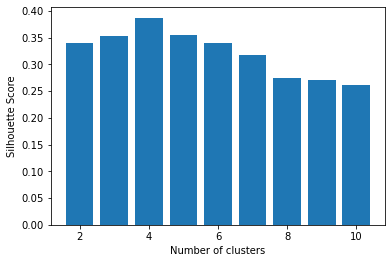

In [9]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## Overview of K-Mean clusters

In [10]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [11]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=4, random_state=12)

In [12]:
# Inertia
kmeans.inertia_

26737.823273779624

In [13]:
# Clusters' center
kmeans.cluster_centers_

array([[ 0.14553228,  0.66146677, -1.2637375 ,  1.69184395, -0.01175163,
        -0.68832082, -0.45768378, -0.56547358, -0.74221641, -0.5510463 ,
         0.81384738,  0.96753965],
       [ 0.35974719, -0.55289361,  0.90243926, -1.20523378, -0.38323462,
        -0.51386419,  0.29961386,  1.33832302,  0.22707674,  1.20417368,
        -1.03194097, -0.64420659],
       [ 0.2344193 , -0.33082175, -0.64836215, -0.71548984,  2.43046953,
        -0.47345925, -0.52850903, -0.6120831 ,  0.41952652, -0.41156111,
        -0.04821266,  0.68408355],
       [ 2.26852822,  0.48395399, -0.72043575, -0.48497149,  0.04378855,
         0.14723168, -0.22263414, -0.51059441, -0.79924241, -0.45593031,
         0.03887026,  0.21143582]])

In [14]:
# Number of iteration
kmeans.n_iter_

9

## Pair plot visualization

In [15]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

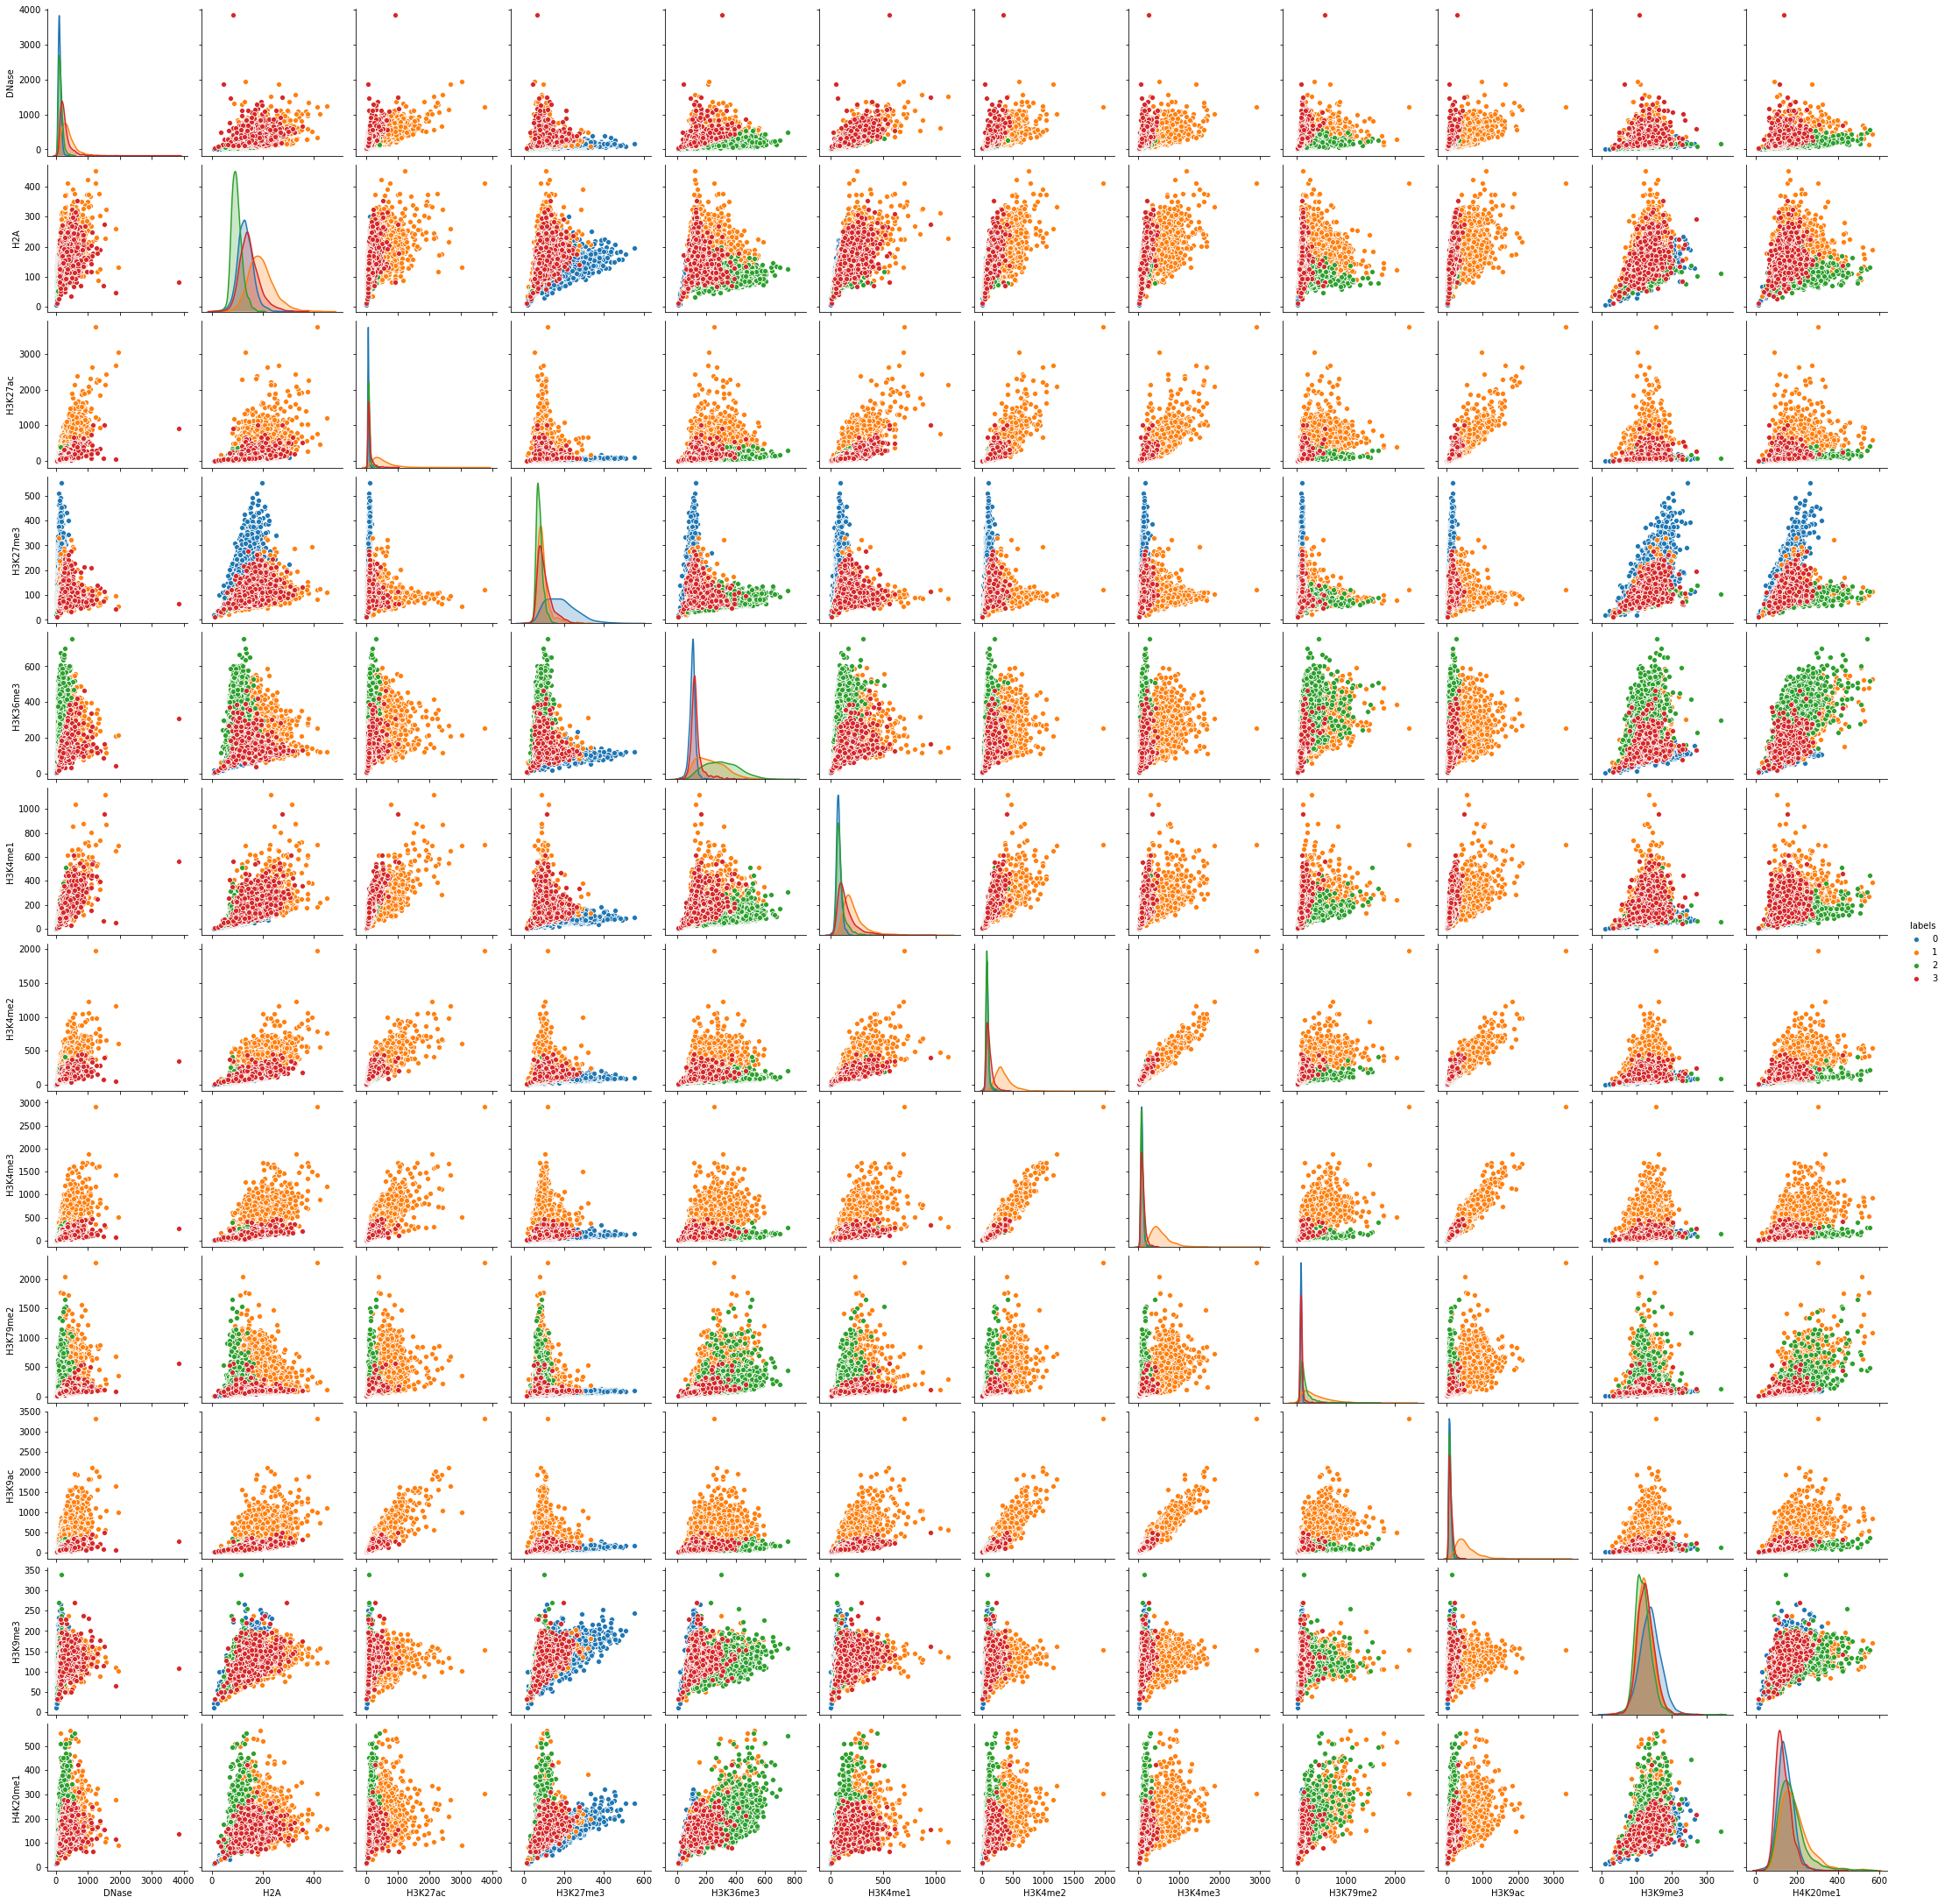

In [16]:
sns.pairplot(labeled,hue='labels')

In [17]:
labeled['Constant'] = "Data"

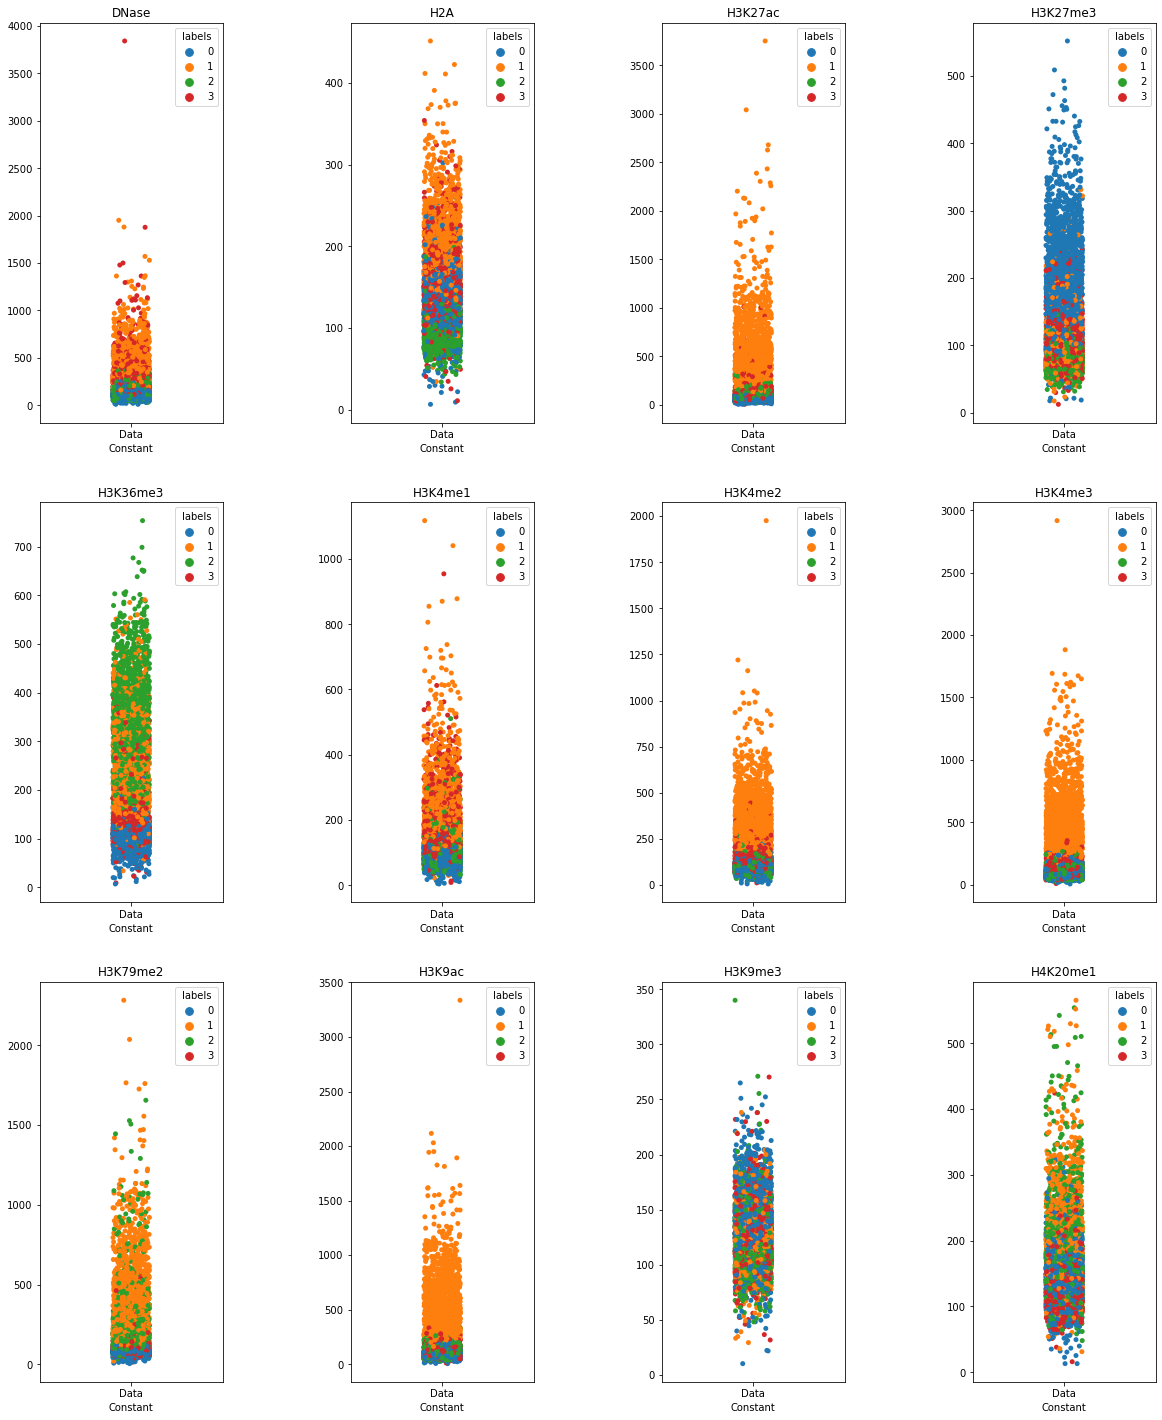

In [18]:
f, axes = plt.subplots(3, 4, figsize=(20, 25), sharex=False) 
f.subplots_adjust(hspace=0.2, wspace=0.7) 
for i in range(0,len(list(labeled))-2): 
    col = labeled.columns[i]
    if i < 4:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[0,(i)])
        ax.set_title(col)
    elif i >= 4 and i<8:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[1,(i-4)]) 
        ax.set_title(col)
    elif i >= 8 and i<12:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[2,(i-8)])
        ax.set_title(col)
    elif i >= 12:
        ax = sns.stripplot(x=labeled['Constant'],y=labeled[col].values,hue=labeled['labels'],jitter=True,ax=axes[3,(i-12)])
        ax.set_title(col)